# Explore here

In [2]:
# Librerias

import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.to_csv('../data/raw/df.csv')

In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.duplicated().sum() # Columnas Duplicadas
print(df['id'].duplicated().sum()) # Verificamos que no hay id duplicados, para garantizar registros únicos


0


In [8]:
# Eliminar informción irrelevante

columnas_eliminar = ['last_review', 'reviews_per_month', 'host_name', 'name']
df.drop(columnas_eliminar, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(7), object(

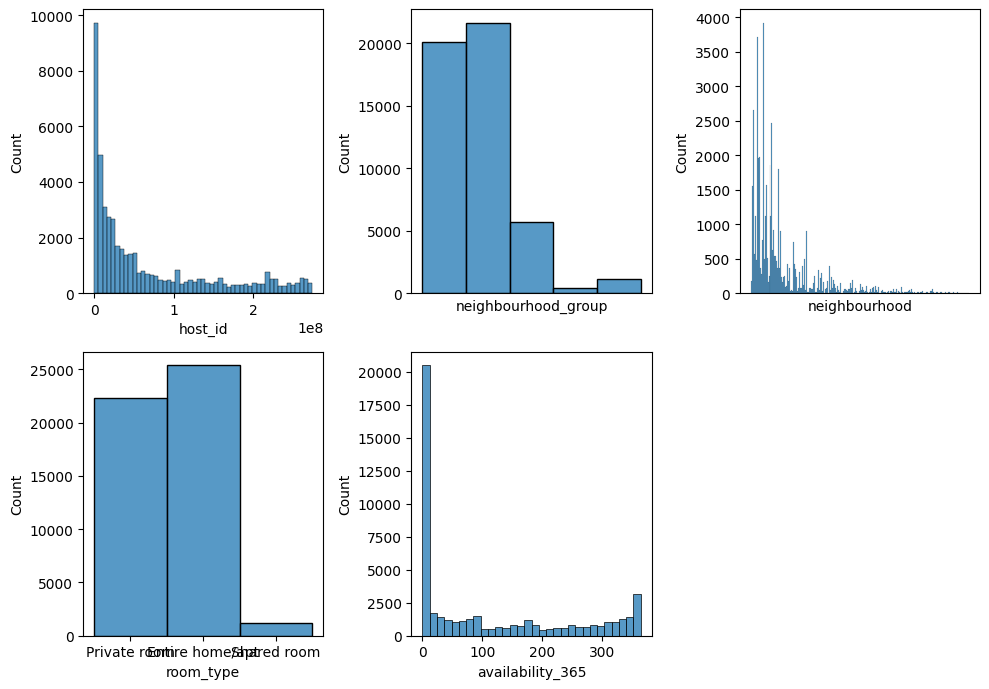

In [9]:
# Anilisis Univariante

    #Analisis Variables Categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3,figsize=(10,7))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='host_id')
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set_xticks([])
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax= axis[1,0],data=df,x='room_type')
sns.histplot(ax= axis[1,1],data=df,x='availability_365')
fig.delaxes(axis[1,2])
plt.tight_layout()
plt.show()



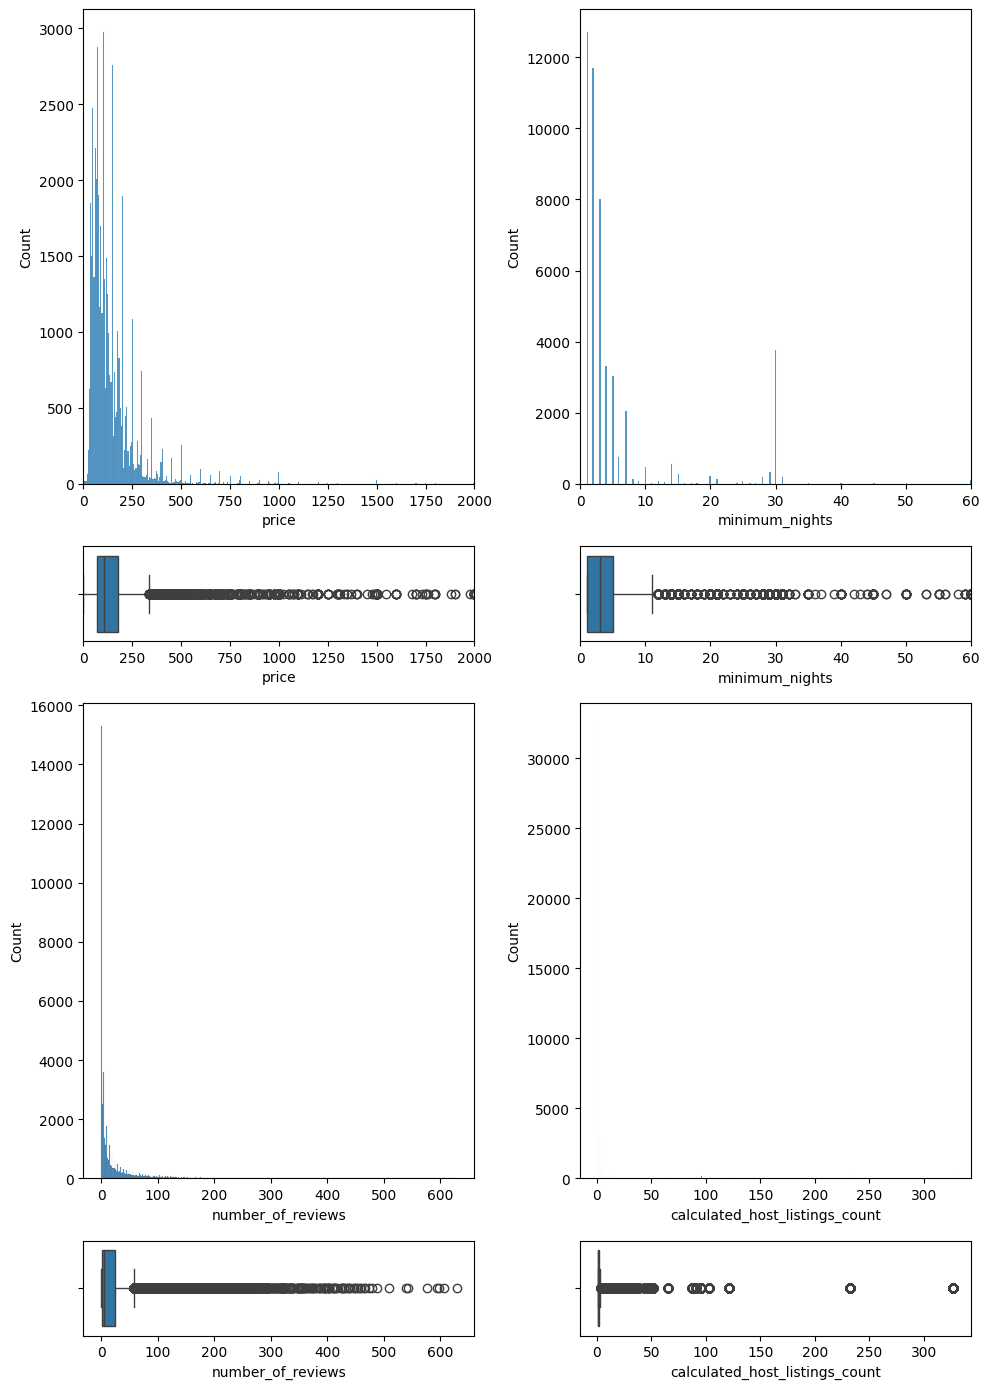

In [10]:
# Analisis numerico


fig, axis = plt.subplots(4,2,figsize=(10,14),gridspec_kw={"height_ratios":[5,1,5,1]})

sns.histplot(ax=axis[0,0],data=df,x='price').set_xlim(0,2000)
sns.boxplot(ax=axis[1,0],data=df,x='price').set_xlim(0,2000)

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights').set_xlim(0,60)
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights').set_xlim(0,60)

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count')
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count')

plt.tight_layout()
plt.show()
            

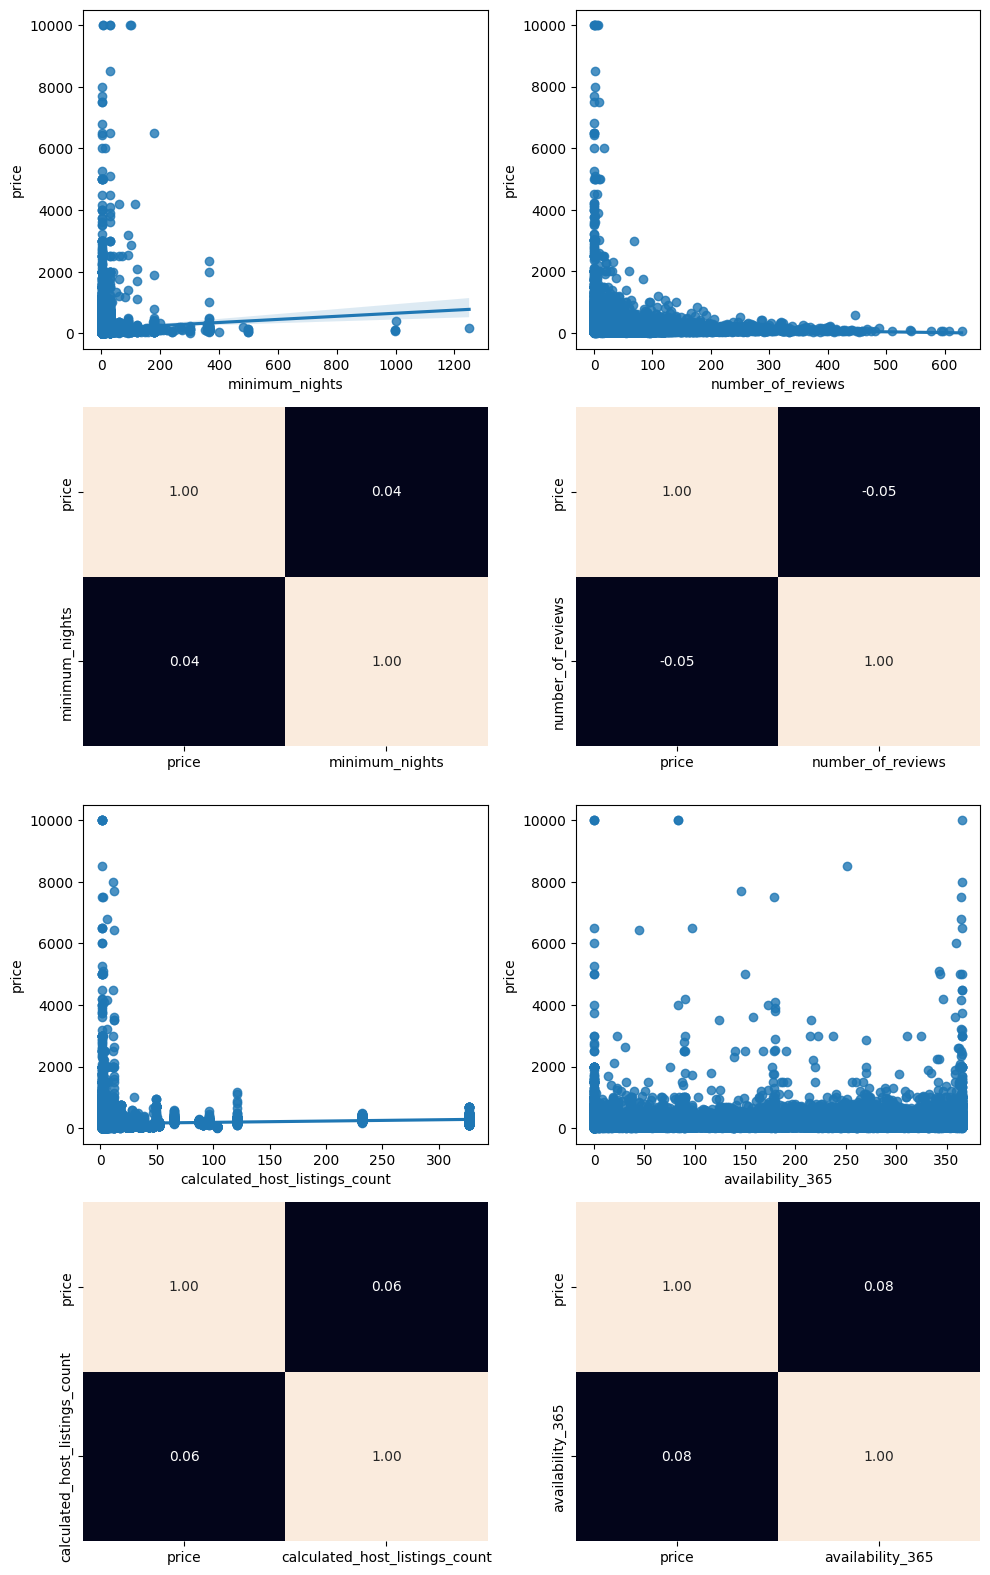

In [11]:
# Anlisis Numerico - numerico

fig, axis = plt.subplots(4,2,figsize=(10,16))

sns.regplot(ax=axis[0,0], data=df, x="minimum_nights", y="price")
sns.heatmap(df[['price','minimum_nights']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="number_of_reviews", y="price")
sns.heatmap(df[['price','number_of_reviews']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="calculated_host_listings_count", y="price")
sns.heatmap(df[['price','calculated_host_listings_count']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="availability_365", y="price")
sns.heatmap(df[['price','availability_365']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

plt.tight_layout()
plt.show()

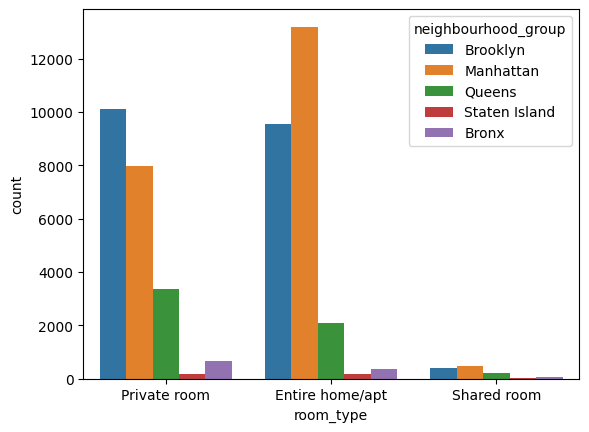

In [12]:
# Analisis Categorico - Categerico 

sns.countplot(data=df,x='room_type',hue='neighbourhood_group')
plt.show()

In [13]:
# Analisis Numerico - Categorico

df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]

df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,2595,2845,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,3647,4632,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,3831,4869,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,5022,7192,1,4,40.79851,-73.94399,1,80,10,9,1,0


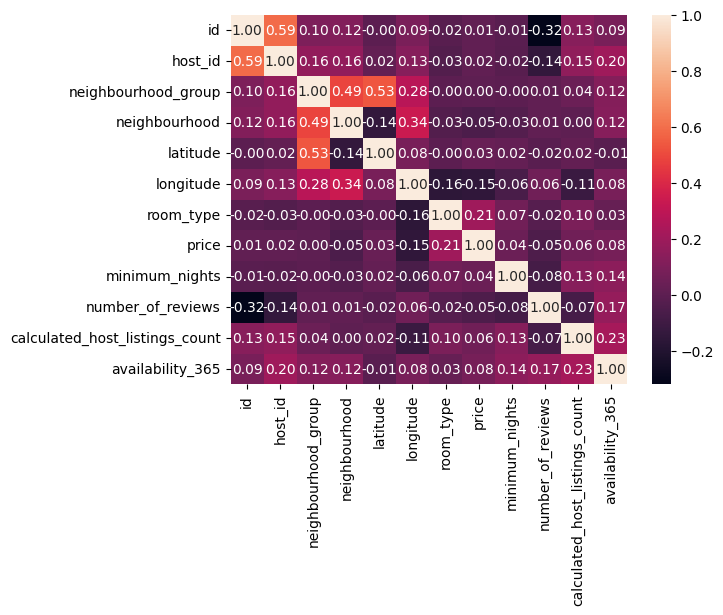

In [14]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [15]:
# Analisis Completo de Correlaciones entre todas las variables

sns.pairplot(data=df)
plt.show()

In [ ]:
# Ingeniería de Caracteristicas

df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


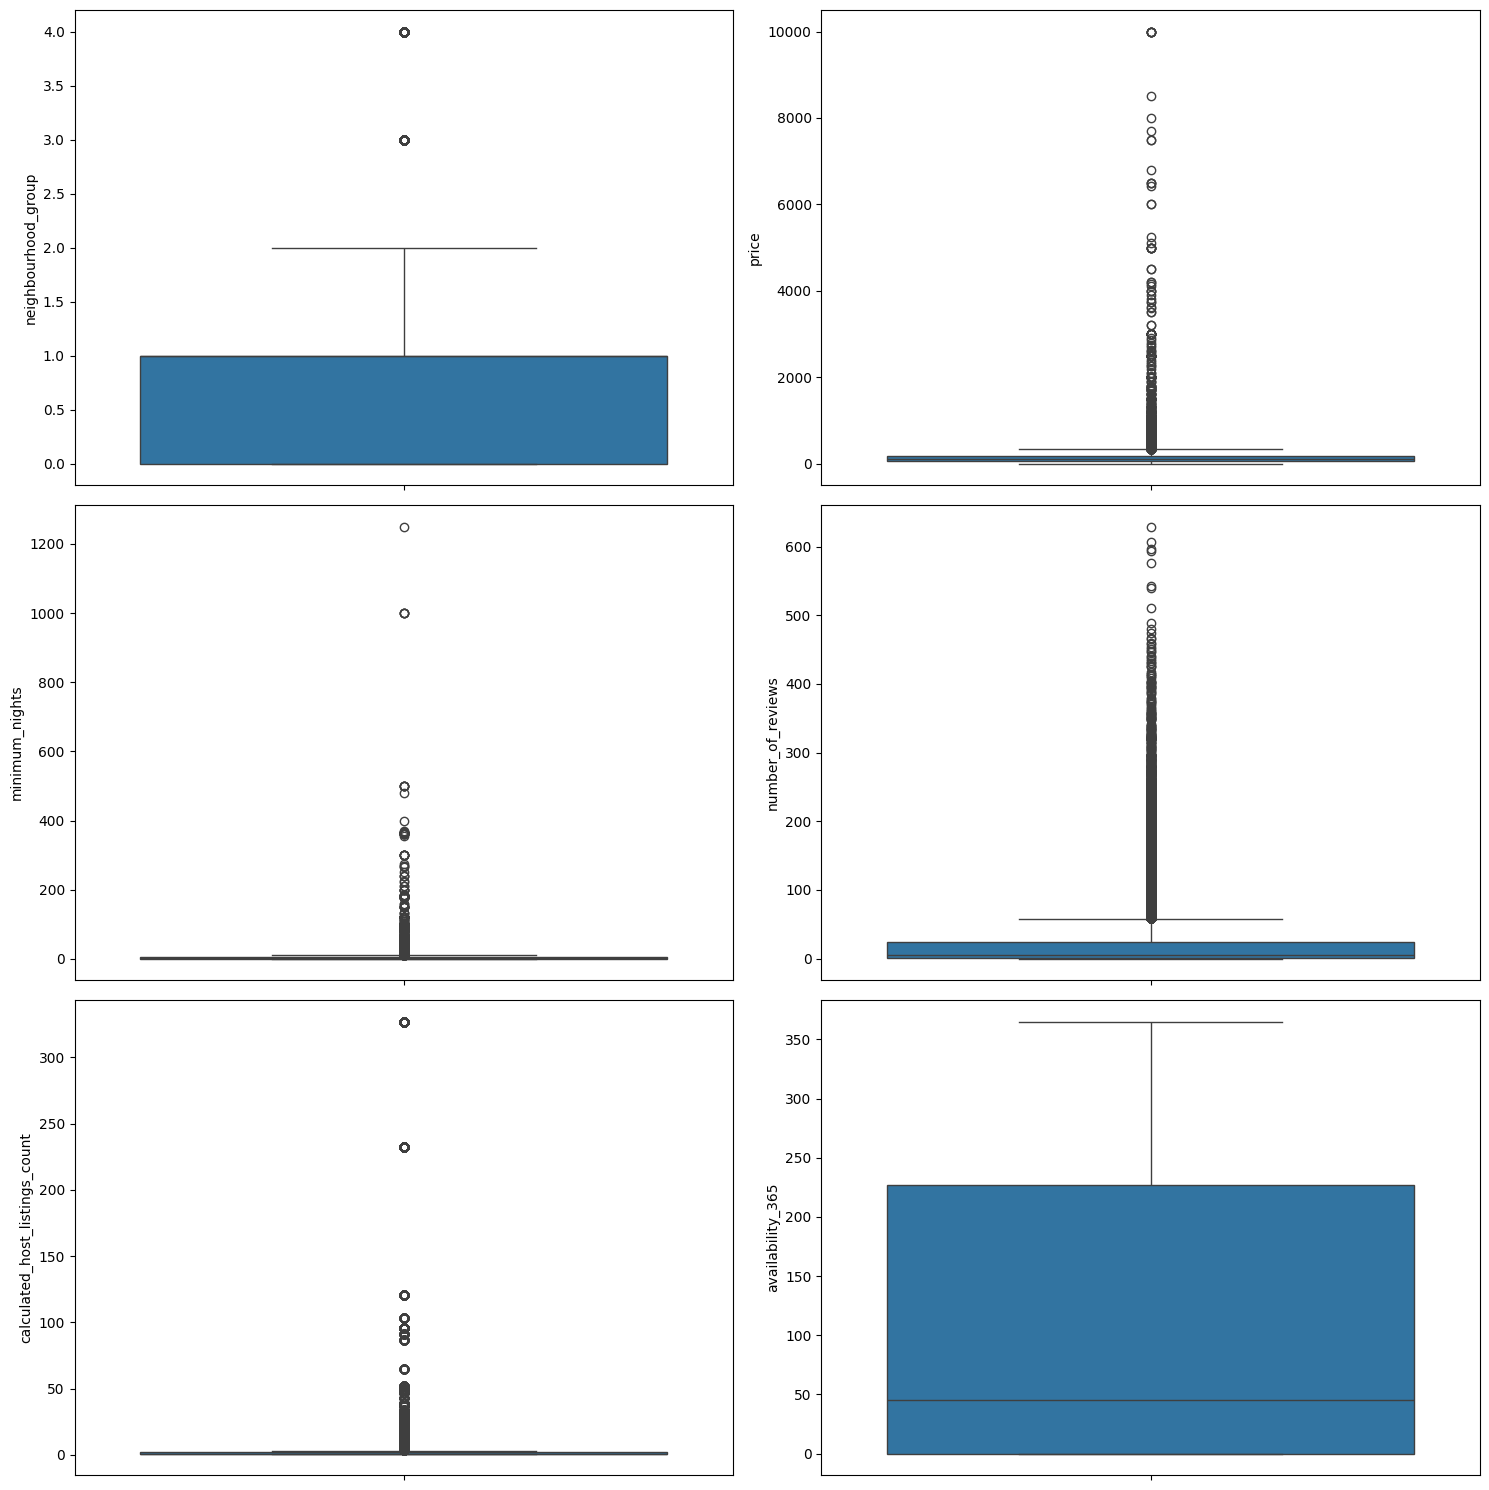

In [ ]:
# Analisamos los Outliers con boxplots

fig, axes =plt.subplots(3,2,figsize=(15,15))

sns.boxplot(ax=axes[0,0],data=df,y='neighbourhood_group')
sns.boxplot(ax=axes[0,1],data=df,y='price')
sns.boxplot(ax=axes[1,0],data=df,y='minimum_nights')
sns.boxplot(ax=axes[1,1],data=df,y='number_of_reviews')
sns.boxplot(ax=axes[2,0],data=df,y='calculated_host_listings_count')
sns.boxplot(ax=axes[2,1],data=df,y='availability_365')

plt.tight_layout()
plt.show()

In [ ]:
estadisticas_price = df['price'].describe()
estadisticas_price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# Rango Intercuartilico

ric_precio = estadisticas_price['75%'] - estadisticas_price['25%']
limite_superio = estadisticas_price['75%'] + 1.5*ric_precio
limite_inferior = estadisticas_price['25%'] - 1.5*ric_precio

print(f'superio {limite_superio} e inferior {limite_inferior}')

superio 334.0 e inferior -90.0


In [ ]:
df[df['price']>334].count()

id                                2972
host_id                           2972
neighbourhood_group               2972
neighbourhood                     2972
latitude                          2972
longitude                         2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64

In [ ]:
df[df['price']<=0].count()

id                                11
host_id                           11
neighbourhood_group               11
neighbourhood                     11
latitude                          11
longitude                         11
room_type                         11
price                             11
minimum_nights                    11
number_of_reviews                 11
calculated_host_listings_count    11
availability_365                  11
dtype: int64

In [ ]:
#Definimos Funcion para Rango Intercuartilico

def analisis_ric(columna,df):
    estadisticas = columna.describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'superio {lim_sup} inferio {lim_inf}')


In [ ]:
analisis_ric('minimum_nights',df)

AttributeError: 'str' object has no attribute 'describe'

In [ ]:
df = df[df['minimum_nights']<=30].count()

#Tarea: Limpiar varias columnas mas
#number_of_reviews, calculated_host_listing_count

In [ ]:
#Valores Faltantes

df.isnull().sum().sort_values(ascending=False)

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# Nuevas Caracteristicas o eliminar redundantes


In [ ]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Escalar Caracteristicas
    # Latitud y Longitud nunca se escalan por ser variables geograficas

from sklearn.preprocessing import MinMaxScaler
 
variables = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
             'number_of_reviews', 'calculated_host_listings_count','availability_365' ]
scaler = MinMaxScaler()
caracteristicas_escaladas = scaler.fit_transform(df[variables])

df_escalado = pd.DataFrame(caracteristicas_escaladas, index=df.index, columns=variables)

df_escalado.head()


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [101]:
# Seleccion de Caracteristicas

from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split

X = df_escalado.drop('price',axis=1)
y = df_escalado['price']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

modelo_de_seleccion = SelectKBest(f_classif,k=5)
modelo_de_seleccion.fit(X_train,y_train)
ix = modelo_de_seleccion.get_support()

X_train_sel = pd.DataFrame(modelo_de_seleccion.transform[X_train],columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo_de_seleccion.transform(X_test),columns=x_test.columns.values[ix])


NameError: name 'df_escalado' is not defined

: 

In [ ]:
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)
X_train_sel.to_csv('../data/processed/train_limpio.csv',index=False)
X_test_sel.to_csv('../data/processed/test_limpio.csv',index=False)